# Introduction

오늘 강의에서 우리는 Varitional Inference (VI) 개념을 학습하였습니다. Variational Inference란, latent variable 모델에서 posterior distribution을 근사하는 방법 중의 하나입니다. Variational Autoencoder (VAE)는 VI를 활용하는 중요한 모델 중의 하나로, unsupervised learning 태스크에서 데이터의 latent structure를 학습하는 모델입니다.

이번 실습을 통해 우리는 다음의 내용들을 학습할 예정입니다.
* Variational Inference (VI)란 무엇인가?
* Variational Autoencoder (VAE)란 무엇인가?
* VAE를 구성하는 구성요소들에 대한 이해 및 직접 구현.
* 구현한 VAE를 학습시키며 다양한 실험들을 진행.



# Variational Inference (VI)

<img src="images/latent.png" alt="Drawing" style="width: 300px;"/>

위의 사진은 VAE에서 전형적으로 사용되는 latent variable graphical model입니다. z는 우리가 볼 수 없는 latent variable을 의미하구요, x는 우리가 관측하는 observed variable입니다. 예를 들면, x는 MNIST 데이터셋(0~9의 숫자가 이미지의 형태로 구성되어 있는 데이터셋)의 한장의 이미지가 될 수 있겠습니다. 잘 학습된 VAE가 있다면, 그림에서처럼 z를 샘플링한 다음에 해당 z와 theta를 이용하여 x를 샘플링하여 realistic한 이미지를 모델로부터 생성할 수 있게 됩니다. 이러한 일련의 데이터 생성이 가능한 기계학습 모델을 generative model이라고 합니다.

Latent variable 모델에서 우리의 목적은 latent variable의 posterior distribution을 구하는 것입니다. 하지만, 이러한 latent variable 모델을 학습하는 것은 trivial하지 않습니다. 왜냐하면 아래와 같은 marginal likelihood를 계산하는 것이 어렵기 때문입니다.

$$p(z|x) = \frac{p(x|z)p(z)}{p(x)}$$
$$p(x) = \int p(x|z; \theta)p(z)dz$$

Variational Inference (VI)는 true posterior distribution을 tractable한 distribution (e.g. Gaussian)으로 근사하여 모델 학습을 가능하게 하는 방법입니다. VI framework에서 approximated variational distribution은 true posterior distribution과 비슷해야하기 때문에 KL divergence metric으로 두 개의 distribution의 유사도를 최소화하고자 합니다.

$$KL[q(z)|p(z|x)] = \int q(z) \log \frac{q(z)}{p(z|x)} dz$$

전개하면,

$$KL[q(z)|p(z|x)] + \mathcal{L}(q|x) = \log p(x)$$
$$\mathcal{L}(q|x) = \mathbb{E}_{q(z)}[\log p(x, z) - \log q(z)]$$

가 됩니다. 여기서 $\mathcal{L}(q|x)$는 Evidence Lower BOund (ELBO)라고 칭하는데, 놀랍게도 ELBO를 maximize함으로서 marginal likelihood를 maximize하는 동시에 $KL[q(z)|p(z|x)]$을 minimize하는 바람직한 효과를 가져오게 됩니다. 우리가 generative model을 알고 있고 $q(z)$를 tractable한 distribution으로 가정하였기 때문에 sampling을 통해 ELBO를 계산할 수 있게 됩니다.

# Variational Autoencoder (VAE)

<img src="images/vae.png" alt="Drawing" style="width: 400px;"/>

우리는 위의 그림이 VAE에서 전형적으로 사용되는 모델이라고 하였습니다. VAE를 조금 더 디테일하게 정의하기 위해 그림에서 표시된 것처럼, $p(z)$와 $p(x|z)$는 Gaussian distribution을 따른다고 가정하며, 특히 $p_\theta(x|z)$는 non-linear한 deep functions으로 parametrize가 됩니다. Deep models은 function approximator로서 우수한 representation 성능을 나타내므로 latent와 observed variables 간의 mapping을 잘 표현할 수 있게 합니다. 

또한, VAE에서 우리는 Variational Inference (VI)를 활용하여 모델을 optimize한다고 하였습니다. 여기에서 variational distribution $q_\phi(z)$가 정의되는데 이 또한 Gaussian으로 정의합니다.

우리의 데이터셋을 $X=\{x_1, ..., x_n\}$ 이라고 하면, 각 latent variable을 $Z=\{z_1, ..., z_n\}$ 으로 정의할 수 있고, 우리의 optimization objective는 다음과 같이 표현할 수 있습니다.

$$\theta^*, \phi^* = \arg\max_{\theta, \phi} \mathcal{L}(q|X)$$

여기서 $\phi=\{\phi_1, ..., \phi_n\}$ 입니다.

우리는 VAE을 optimize하기 위해 모든 setup을 마쳤습니다! 하지만, 몇 가지 문제점이 있습니다.

1. 학습 데이터가 많아질수록 optimize해야하는 parameter가 증가합니다.
2. 테스트 데이터에 대한 inference가 trivial하지 않습니다.

1번에 관해, 학습 데이터가 큰 경우에는 절대적인 parameter 수가 많아지게 되므로 학습 시간이 증가하게 됩니다. 실제 practical한 경우에는 데이터가 엄청 크기 때문에 이에 따른 scalability 이슈가 발생합니다. 2번에 관해서는, 새로운 데이터가 들어오면 새로운 variational parameter가 정의되야하기 때문에 inference가 trivial하지 않게 되며, 또 다른 optimization을 해야하는 경우가 발생할 수 있습니다. 이는 practical한 경우에 inference에 대한 latency가 증가하기 때문에 undesirable한 경우가 있을 수 있습니다. 

## Amortized Inference

<img src="images/amortize.png" alt="Drawing" style="width: 500px;"/>

이를 해결하기 위해 amortized inference 개념이 도입됩니다. 위에 그림에 나와있듯이 amortized inference는 x와 z사이의 mapping을 정의하고 이를 deep function으로 parametrize하는 방법을 뜻합니다. Amortized inference는 강의에서도 설명했듯이 trade-off가 있습니다.

* Pros: Faster computation in training and inference
* Cons: Smaller class of approximation

하지만 충분히 expressive한 deep function을 정의한다면 approximation의 gap은 채워질 수 있으며, 여러 실험 결과들에서 practically admittable하다는 것을 반증하고 있습니다.

정리하면 다음과 같은 그림으로 도식화할 수 있겠습니다.

<img src="images/vae_decoder.png" alt="Drawing" style="width: 600px;"/>

이제 VAE를 구현하기 위한 setup이 완료되었으니, 실제 구현을 통해 VAE를 다뤄보도록 하겠습니다. 

아래의 VAE 구현은 https://github.com/hwalsuklee/tensorflow-mnist-VAE 에 기반한 것임을 밝힙니다.

In [1]:
# Import packages we need for implementing VAE
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
import tensorflow as tf

/home/eunhyuk/anaconda3/envs/p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/eunhyuk/anaconda3/envs/p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/eunhyuk/anaconda3/envs/p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/eunhyuk/anaconda3/envs/p36/lib/python3.6/site-

## Encoder (Inference) Network

가장 처음으로 VAE의 encoder 파트를 구현해보도록 하겠습니다. Encoder network $q(z|x)$는 Inference network라고도 불리며 observed data인 x를 input으로 받아서 latent variable z를 encode (infer)하는 네트워크입니다. Description을 잘 읽어보고 **TODO**를 채워주세요.

힌트는 [여기](#hint1 "Output dimension에 유의하세요. 파라미터를 정의하는 부분은 1st, 2nd layers에서 어떻게 했는지 참고하세요") 를 보세요.

답은 [여기](#hint1 "wo = tf.get_variable('wo', [h1.get_shape()[1], n_output * 2], initializer=w_init)
bo = tf.get_variable('bo', [n_output * 2], initializer=b_init)
gaussian_params = tf.matmul(h1, wo) + bo") 를 보세요.

In [2]:
# Implement encoder network in VAE

def encoder(x, n_hidden, n_output, keep_prob):
    """
    This function build a part of graph for encoder (3-layer MLP) in VAE.
    Encoder inputs the observed data and outputs the latent (Gaussian) distribution.

    Args:
        x: the observed data 
        n_hidden: a number of hidden units in MLP
        n_output: a size of latent dimension
        keep_prob: keeping probability for dropout layers in MLP
    
    Returns:
        mean: mean parameters of latent (Gaussian) distribution
        stddev: diagonal stddev parameters of latent (Gaussian) distribution
    """

    with tf.variable_scope("encoder"):
        # initializers for weight and bias matrices
        w_init = tf.contrib.layers.variance_scaling_initializer()
        b_init = tf.constant_initializer(0.)

        # 1st hidden layer
        w0 = tf.get_variable('w0', [x.get_shape()[1], n_hidden], initializer=w_init)
        b0 = tf.get_variable('b0', [n_hidden], initializer=b_init)
        h0 = tf.matmul(x, w0) + b0
        h0 = tf.nn.elu(h0)
        h0 = tf.nn.dropout(h0, keep_prob)

        # 2nd hidden layer
        w1 = tf.get_variable('w1', [h0.get_shape()[1], n_hidden], initializer=w_init)
        b1 = tf.get_variable('b1', [n_hidden], initializer=b_init)
        h1 = tf.matmul(h0, w1) + b1
        h1 = tf.nn.tanh(h1)
        h1 = tf.nn.dropout(h1, keep_prob)

        # output layer
        ### TODO implement output layer of encoder network ###
        wo = tf.get_variable('wo', [h1.get_shape()[1], n_output * 2], initializer=w_init)
        bo = tf.get_variable('bo', [n_output * 2], initializer=b_init)
        gaussian_params = tf.matmul(h1, wo) + bo 

        # The mean parameter is unconstrained
        mean = gaussian_params[:, :n_output]
        # The standard deviation must be positive. Parametrize with a softplus and
        # add a small epsilon for numerical stability
        stddev = 1e-6 + tf.nn.softplus(gaussian_params[:, n_output:])

    return mean, stddev

## Decoder Network

다음으로 VAE의 decoder 파트를 구현해보도록 하겠습니다. Decoder network $p(x|z)$는 Inference network라고도 불리며 latent variable인 z를 input으로 받아서 observed variable x를 generate하는 네트워크입니다. Description을 잘 읽어보고 **TODO**를 채워주세요.

힌트는 [여기](#hint1 "Output distribution (Bernoulli distribution)에 유의하세요.") 를 보세요.

답은 [여기](#hint1 "wo = tf.get_variable('wo', [h1.get_shape()[1], n_output], initializer=w_init)
bo = tf.get_variable('bo', [n_output], initializer=b_init)
y = tf.sigmoid(tf.matmul(h1, wo) + bo)") 를 보세요.

In [3]:
# Implement decoder network in VAE

def decoder(z, n_hidden, n_output, keep_prob, reuse=False):
    """
    This function build a part of graph for decoder (3-layer MLP) in VAE.
    Decoder inputs the latant code and outputs the output (Bernoulli) distribution.
    
    Args:
        z: the latent codes of the latent distribution
        n_hidden: a number of hidden units in MLP
        n_output: a number of output dimension (here the dimension of image)
        keep_prob: keeping probability for dropout layers in MLP
        reuse: parameter sharing option for tf.variable_scope
    
    Returns:
        y: parameters of the output (Bernoulli) distribution. 
            In other words, they range from 0 to 1.
           (Which activation function should we use?)
    """

    with tf.variable_scope("decoder", reuse=reuse):
        # initializers for weight and bias matrices
        w_init = tf.contrib.layers.variance_scaling_initializer()
        b_init = tf.constant_initializer(0.)

        # 1st hidden layer
        w0 = tf.get_variable('w0', [z.get_shape()[1], n_hidden], initializer=w_init)
        b0 = tf.get_variable('b0', [n_hidden], initializer=b_init)
        h0 = tf.matmul(z, w0) + b0
        h0 = tf.nn.tanh(h0)
        h0 = tf.nn.dropout(h0, keep_prob)

        # 2nd hidden layer
        w1 = tf.get_variable('w1', [h0.get_shape()[1], n_hidden], initializer=w_init)
        b1 = tf.get_variable('b1', [n_hidden], initializer=b_init)
        h1 = tf.matmul(h0, w1) + b1
        h1 = tf.nn.elu(h1)
        h1 = tf.nn.dropout(h1, keep_prob)

        # output layer-mean
        ### TODO implement output layer of decoder network ###
        wo = tf.get_variable('wo', [h1.get_shape()[1], n_output], initializer=w_init)
        bo = tf.get_variable('bo', [n_output], initializer=b_init)
        y = tf.sigmoid(tf.matmul(h1, wo) + bo)

    return y

## VAE

다음으로 encoder network와 decoder network로 구성된 VAE를 구현해보도록 하겠습니다. 

<img src="images/reparametrization.png" alt="Drawing" style="width: 800px;"/>

위의 모식도는 두 가지 버젼의 VAE의 forward path를 정의하고 있는데요, 두 버젼은 VAE를 학습하는데 중요한 technique의 유/무에 차이가 있습니다.

### Quick question ###
위의 모식도의 두 버젼의 차이점은 무엇일까요?

답은 [여기](#hint1 "Backpropagation can be applied only to the right network for training both encoder and decoder network.") 를 보세요.

**TODO**: Quick question의 답에 유의하여 아래의 `build_graph` 안에 re-parametrization trick을 구현해 보세요.

힌트는 [여기](#hint1 "Gaussian distribution의 성질을 생각해 보세요.") 를 보세요.
함수 사용방법은 https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/random/normal 를 참고하세요

답은 [여기](#hint1 "z = mean + stddev * tf.random_normal(tf.shape(mean), 0, 1, dtype=tf.float32)") 를 보세요.

**TODO**: `build_loss` 안에 ELBO를 구현해 보세요.

답은 [여기](#hint1 "ELBO = marginal_likelihood - KL_divergence") 를 보세요.

**TODO**: `build_training` 안에 AdamOptimizer를 구현해 보세요.

참고 : https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/train/AdamOptimizer

답은 [여기](#hint1 "optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)") 를 보세요.

In [4]:
# Implement VAE

class VAE(object):
    """
    This class defines a complete computational graph for training VAE.
    
    The components are composed of:
        Encoder for encoding input images
        Decoder for decoding latent variables to images
        Re-parametrization trick for implementing back-propagation algorithm
    
    TBD for more details
    """

    def __init__(self, dim_img, dim_latent, n_hidden):
        self.dim_img = dim_img
        self.dim_latent = dim_latent
        self.n_hidden = n_hidden

        # define placeholders for training VAE
        self.x = tf.placeholder(tf.float32, shape=[None, self.dim_img], name='target_img')
        self.keep_prob = tf.placeholder(tf.float32, name='keep_prob')

    def build_graph(self):
        """
        This function builds the graph operations of neural network model for VAE.

        Args:
            None
        
        Returns:
            y: predictions of VAE (reconstructed image of inputs)
            z: the latent codes of the latent distribution
            mean: mean of the latent (Gaussian) distribution
            stddev: standard deviation of the latent (Gaussian) distribution
        """

        # define encoder network
        mean, stddev = encoder(self.x, self.n_hidden, self.dim_latent, self.keep_prob)

        ### TODO implement re-parametrization trick ###
        z = mean + stddev * tf.random_normal(tf.shape(mean), 0, 1, dtype=tf.float32)

        # define decoder network
        y = decoder(z, self.n_hidden, self.dim_img, self.keep_prob)
        y = tf.clip_by_value(y, 1e-8, 1 - 1e-8)

        return y, z, mean, stddev

    def build_loss(self, y, mean, stddev):
        """
        This function builds the graph operations of loss function for training VAE.

        Args:
            y: predictions of VAE (reconstructed image of inputs)
            mean: mean of the latent (Gaussian) distribution
            stddev: standard deviation of the latent (Gaussian) distribution
        
        Returns:
            loss: negative value of ELBO
            -marginal_likelihood: negative value of marginal likelihood
            KL_divergence:  KL divergence between the latent distribution and N(0, 1)
        """

        # NOTE compute loss
        marginal_likelihood = tf.reduce_sum(self.x * tf.log(y) + (1 - self.x) * tf.log(1 - y), 1)
        KL_divergence = 0.5 * tf.reduce_sum(
            tf.square(mean) + tf.square(stddev) - tf.log(1e-8 + tf.square(stddev)) - 1, 1)

        marginal_likelihood = tf.reduce_mean(marginal_likelihood)
        KL_divergence = tf.reduce_mean(KL_divergence)

        ### TODO implement ELBO with marginal_likelihood and KL_divergence
        ELBO = marginal_likelihood - KL_divergence

        loss = -ELBO

        return loss, -marginal_likelihood, KL_divergence

    def build_training(self, loss, learning_rate):
        """
        This function builds the graph operations for performing training.
    
        Args:
            loss: loss value for the model
            learning_rate: the learning rate to use for the training procedure
        
        Returns:
            optimizer: Adam optimizer for traning VAE
        """
        ### TODO implement AdamOptimizer with learning_rate and loss
        optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

        return optimizer

## Training and Evaluation of VAE

다음으로 구현된 VAE 모델을 이용하여 MNIST 데이터를 학습 시켜보고자 합니다. Tensorflow에 내장된 backpropagation 알고리즘을 통해 stochastic gradient descent로 모델을 optimize하는 코드입니다. **TODO**를 완성하여 코드를 실행해보고, loss가 적절하게 감소되는지 확인합니다. 

**TODO**: sess.run() 안에 들어갈 arguments들을 적절히 채워넣어 보세요.

답은 [여기](#hint1 "_, tot_loss, loss_likelihood, loss_divergence = sess.run(
                    (optimizer, loss, neg_marginal_likelihood, KL_divergence),
                    feed_dict={
                        vae.x: batch_input,
                        vae.keep_prob: 0.9
                    })") 를 보세요.

In [5]:
import tensorflow as tf
import numpy as np
import plot_utils 
import os

In [6]:
def train_and_evaluate(dim_z):
    # dataset setting (MNIST)
    data_train, data_test = tf.keras.datasets.mnist.load_data()
    (images_train, labels_train) = data_train
    (images_test, labels_test) = data_test
    images_train = images_train.reshape(images_train.shape[0], -1) / 255.
    images_test = images_test.reshape(images_test.shape[0], -1) / 255.
    num = np.unique(labels_test, axis=0)
    num = num.shape[0]
    labels_test = np.eye(num)[labels_test]
    n_samples = images_train.shape[0]

    # experimental setting
    img_len = 28
    dim_img = img_len * img_len
    batch_size = 128
    learning_rate = 1e-3
    n_epochs = 60
    n_hidden = 500

    # model setting and build complete graph for VAE
    vae = VAE(dim_img, dim_z, n_hidden)
    y, z, mean, stddev = vae.build_graph()
    loss, neg_marginal_likelihood, KL_divergence = vae.build_loss(y, mean, stddev)
    optimizer = vae.build_training(loss, learning_rate)

    # Plot for reproduce performance
    results_dir = 'results-' + str(dim_z)
    if not os.path.exists(results_dir):
        print("Checkpoint Directory does not exist! Making directory {}".format(results_dir))
        os.mkdir(results_dir)
    PRR = plot_utils.Plot_Reproduce_Performance(results_dir)
    x_PRR = images_test[0:PRR.n_tot_imgs, :]
    x_PRR_img = x_PRR.reshape(PRR.n_tot_imgs, img_len, img_len)
    PRR.save_images(x_PRR_img, name='input.jpg')

    # Plot for manifold learning result
    z_in = tf.placeholder(tf.float32, shape=[None, dim_z], name='latent_variable')
    if dim_z == 2:
        PMLR = plot_utils.Plot_Manifold_Learning_Result(results_dir)
        x_PMLR = images_test[0:5000, :]
        id_PMLR = labels_test[0:5000, :]
        decoded = decoder(z_in, n_hidden, dim_img, 1.0, reuse=True)

    # train VAE on MNIST
    total_batch = int(n_samples / batch_size)
    min_tot_loss = float('inf')

    with tf.Session() as sess:

        sess.run(tf.global_variables_initializer(), feed_dict={vae.keep_prob: 0.9})

        for epoch in range(n_epochs):
            # random shuffling
            np.random.shuffle(images_train)
            train_data = images_train

            # loop over all batches
            for i in range(total_batch):
                # compute the offset of the current minibatch in the data.
                offset = (i * batch_size) % (n_samples)
                batch_input = train_data[offset:(offset + batch_size), :]

                ### TODO fill the arguments of sess.run(args) ###
                _, tot_loss, loss_likelihood, loss_divergence = sess.run(
                    (optimizer, loss, neg_marginal_likelihood, KL_divergence),
                    feed_dict={
                        vae.x: batch_input,
                        vae.keep_prob: 0.9
                    })
            # print cost every epoch
            print("epoch %d: loss %03.2f neg_marginal_likelihood %03.2f KL_divergence %03.2f" %
                  (epoch, tot_loss, loss_likelihood, loss_divergence))

            # if minimum loss is updated or final epoch, plot results
            if min_tot_loss > tot_loss or epoch + 1 == n_epochs:
                min_tot_loss = tot_loss
                # Plot for reproduce performance
                if PRR:
                    y_PRR = sess.run(y, feed_dict={vae.x: x_PRR, vae.keep_prob: 1})
                    y_PRR_img = y_PRR.reshape(PRR.n_tot_imgs, img_len, img_len)
                    PRR.save_images(y_PRR_img, name="/PRR_epoch_%02d" % (epoch) + ".png")

                # Plot for manifold learning result
                if dim_z == 2:
                    y_PMLR = sess.run(decoded, feed_dict={z_in: PMLR.z, vae.keep_prob: 1})
                    y_PMLR_img = y_PMLR.reshape(PMLR.n_tot_imgs, img_len, img_len)
                    PMLR.save_images(y_PMLR_img, name="/PMLR_epoch_%02d" % (epoch) + ".png")

                    # plot distribution of labeled images
                    z_PMLR = sess.run(z, feed_dict={vae.x: x_PMLR, vae.keep_prob: 1})
                    PMLR.save_scattered_image(z_PMLR,
                                              id_PMLR,
                                              name="/PMLR_map_epoch_%02d" % (epoch) + ".png")

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Checkpoint Directory does not exist! Making directory results-2
epoch 0: loss 180.46 neg_marginal_likelihood 173.06 KL_divergence 7.40
epoch 1: loss 168.80 neg_marginal_likelihood 161.98 KL_divergence 6.82
epoch 2: loss 162.48 neg_marginal_likelihood 156.53 KL_divergence 5.95
epoch 3: loss 158.74 neg_marginal_likelihood 152.91 KL_divergence 5.84
epoch 4: loss 159.78 neg_marginal_likelihood 153.66 KL_divergence 6.12
epoch 5:

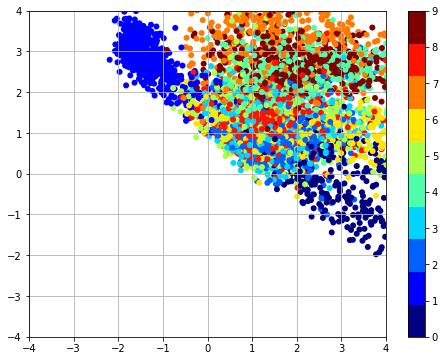

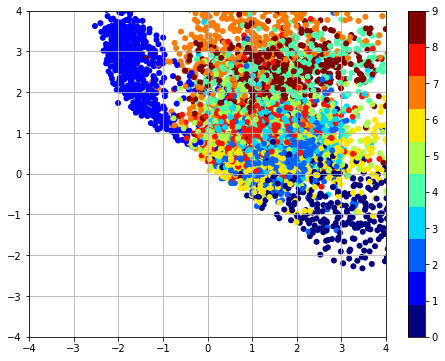

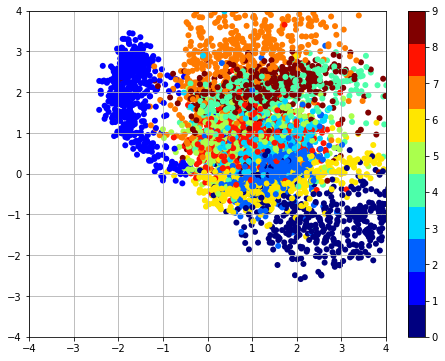

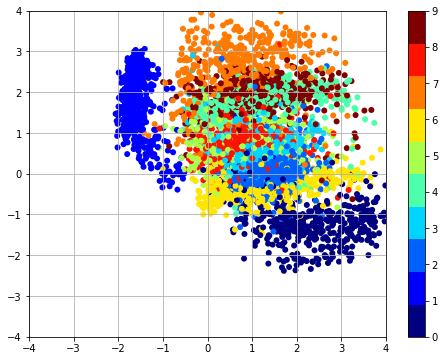

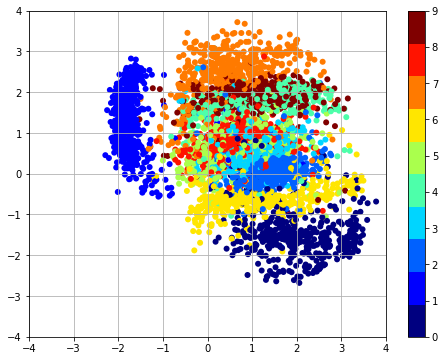

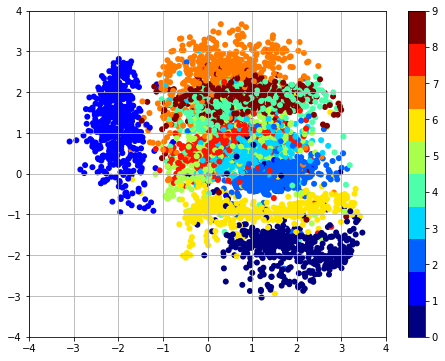

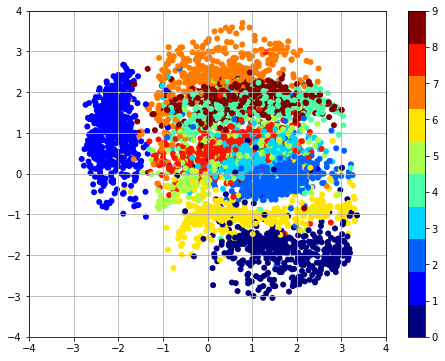

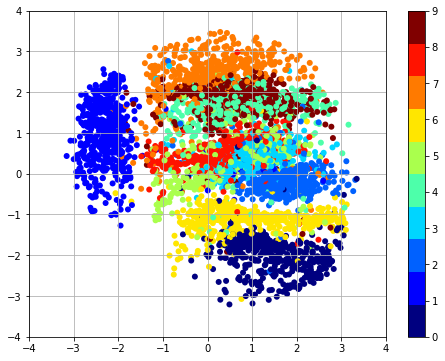

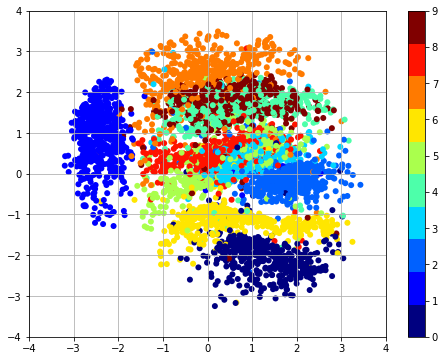

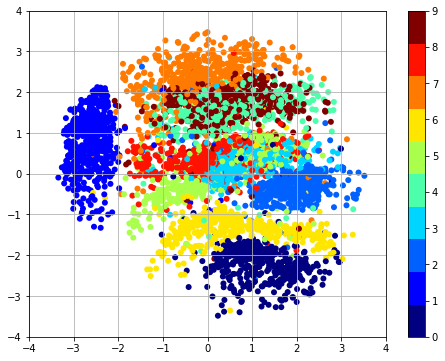

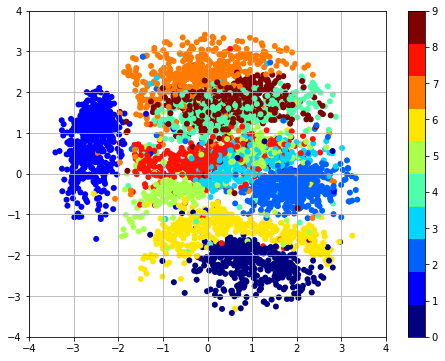

In [7]:
tf.reset_default_graph()
dim_z = 2
train_and_evaluate(dim_z)

## Visualization of VAE

VAE의 유용성을 보이기 위해 세 가지 visualization을 제공합니다.

* Data generation process: Random x generation from q(x|z).
* Latent manifold space: Visualize latent manifold space by corresponding observed data.
* Latent manifold clustering: Cluster MNIST dataset by their labels in 2-dimensional latent space.

**Jupyter notebook root 폴더의 results 폴더에서 각 실험결과를 확인하세요. Training이 진행될 수록 성능이 좋아지는 것을 확인할 수 있습니다.**

results-2/PRR_epoch_00.png


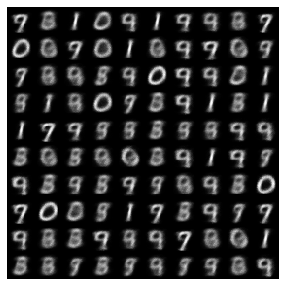

results-2/PRR_epoch_01.png


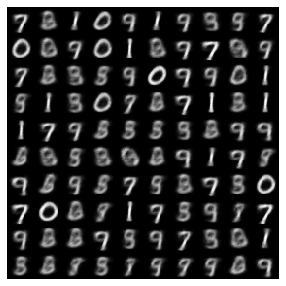

results-2/PRR_epoch_02.png


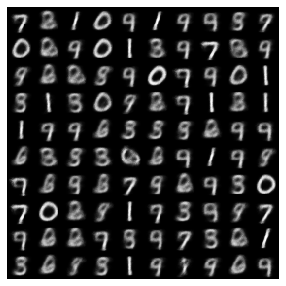

results-2/PRR_epoch_03.png


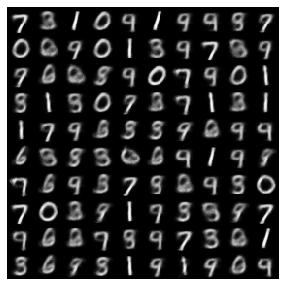

results-2/PRR_epoch_06.png


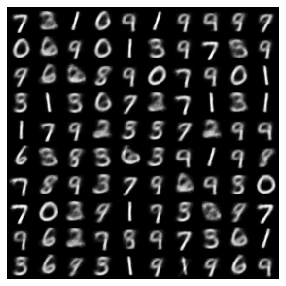

results-2/PRR_epoch_10.png


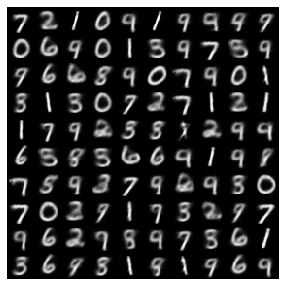

results-2/PRR_epoch_12.png


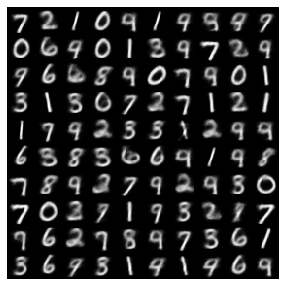

results-2/PRR_epoch_18.png


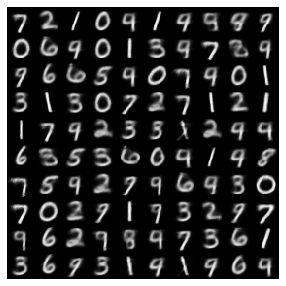

results-2/PRR_epoch_27.png


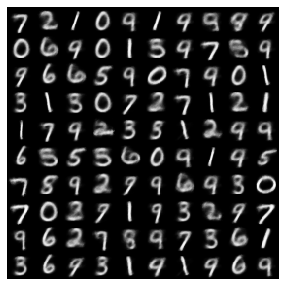

results-2/PRR_epoch_44.png


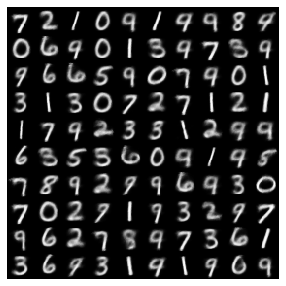

results-2/PRR_epoch_59.png


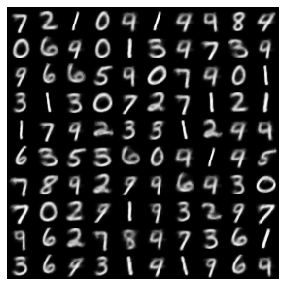

In [8]:
# Data generation process
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_image_by_filename(filename):
    plt.figure(figsize=(5, 5))
    img = mpimg.imread(filename)
    imgplot = plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.show()
    
prefix = 'PRR'
image_dir = 'results-' + str(2)

filenames = {}
for filename in os.listdir(image_dir):
    if filename.startswith(prefix): 
        value = os.path.join(image_dir, filename)
        key = value.split('.')[0][-2:]
        filenames[key] = value
        
for key, value in sorted(filenames.items()):
    print(value)
    plot_image_by_filename(value)

results-2/PMLR_epoch_00.png


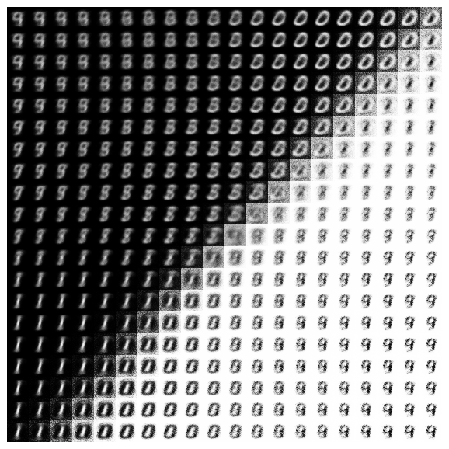

results-2/PMLR_epoch_01.png


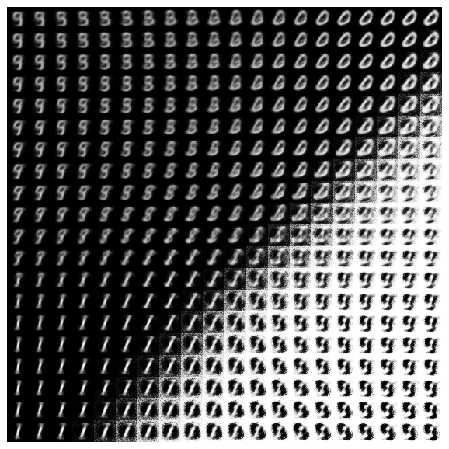

results-2/PMLR_epoch_02.png


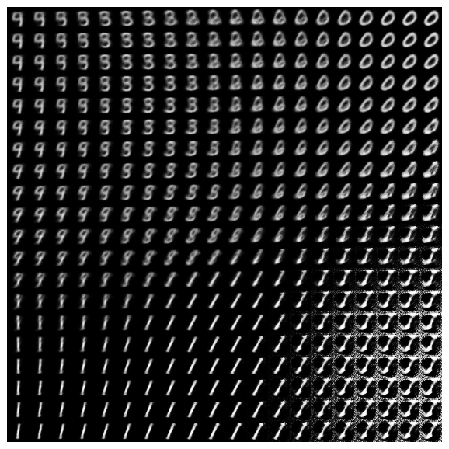

results-2/PMLR_epoch_03.png


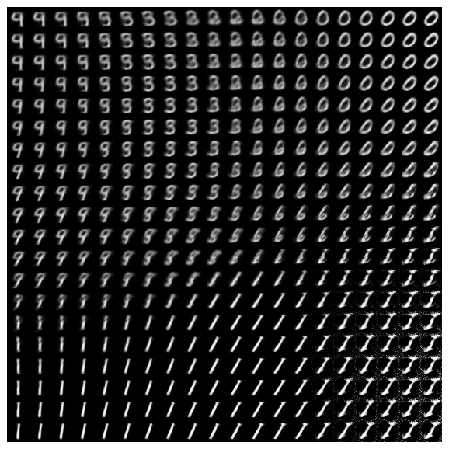

results-2/PMLR_epoch_06.png


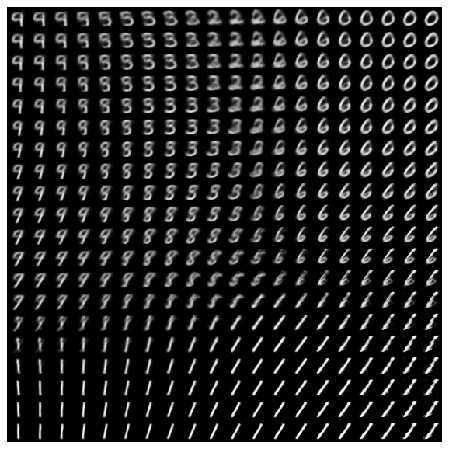

results-2/PMLR_epoch_10.png


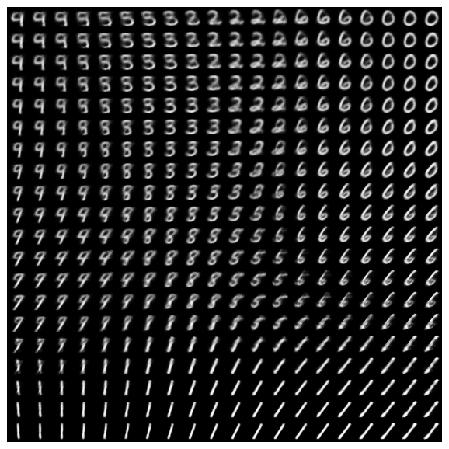

results-2/PMLR_epoch_12.png


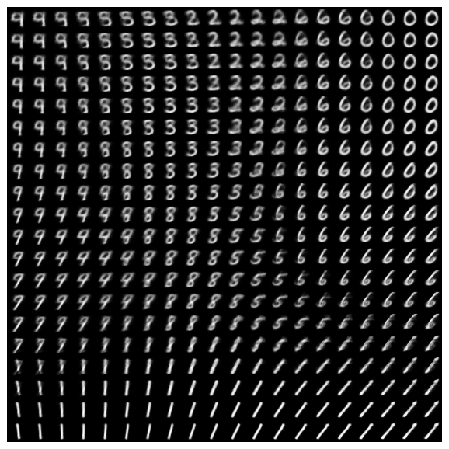

results-2/PMLR_epoch_18.png


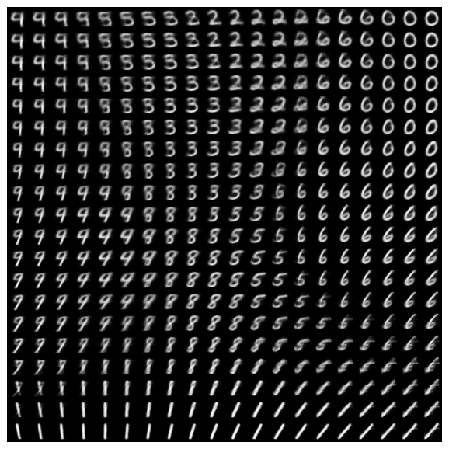

results-2/PMLR_epoch_27.png


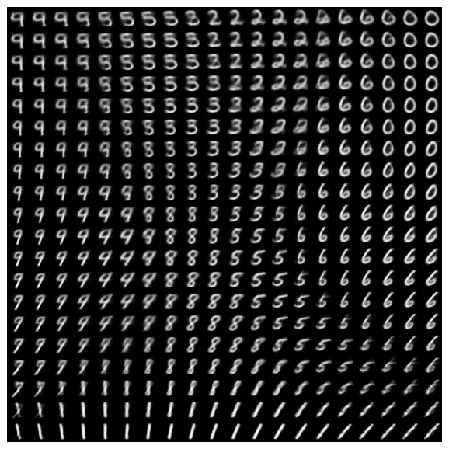

results-2/PMLR_epoch_44.png


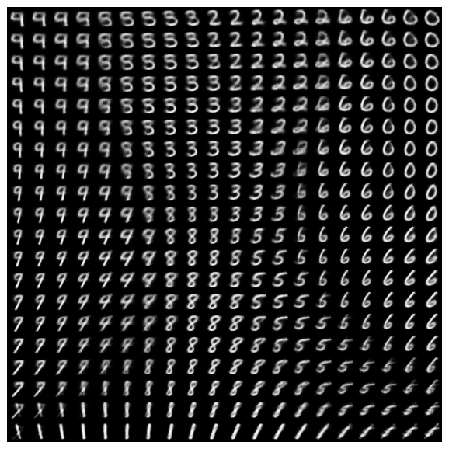

results-2/PMLR_epoch_59.png


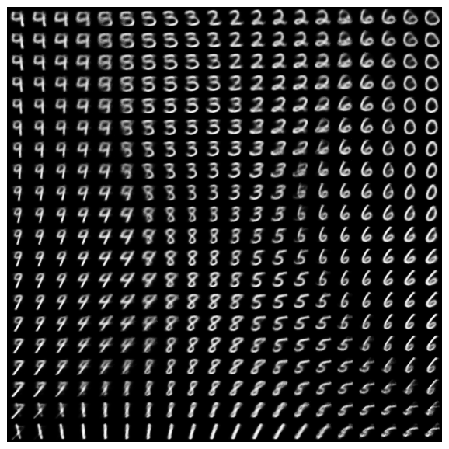

In [9]:
# Latent manifold space
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_image_by_filename(filename):
    plt.figure(figsize=(8, 8))
    img = mpimg.imread(filename)
    imgplot = plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.show()
    
prefix = 'PMLR_epoch'
image_dir = 'results-' + str(2)

filenames = {}
for filename in os.listdir(image_dir):
    if filename.startswith(prefix): 
        value = os.path.join(image_dir, filename)
        key = value.split('.')[0][-2:]
        filenames[key] = value
        
for key, value in sorted(filenames.items()):
    print(value)
    plot_image_by_filename(value)

results-2/PMLR_map_epoch_00.png


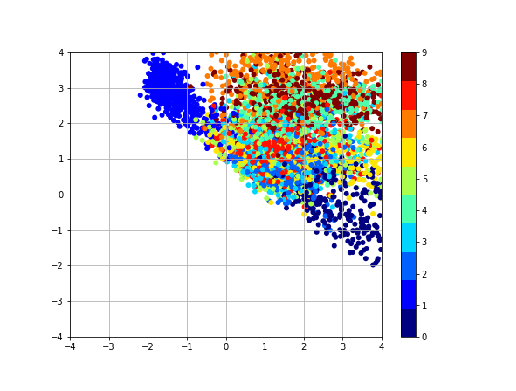

results-2/PMLR_map_epoch_01.png


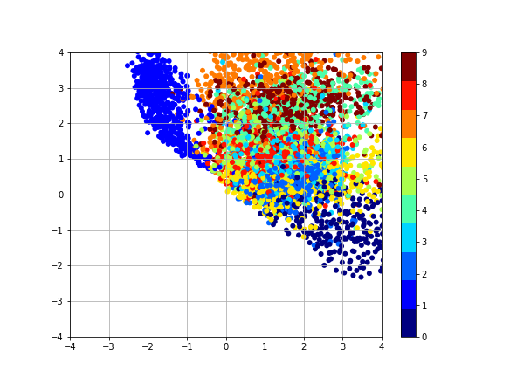

results-2/PMLR_map_epoch_02.png


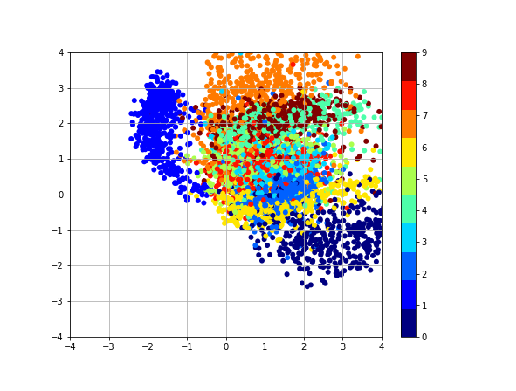

results-2/PMLR_map_epoch_03.png


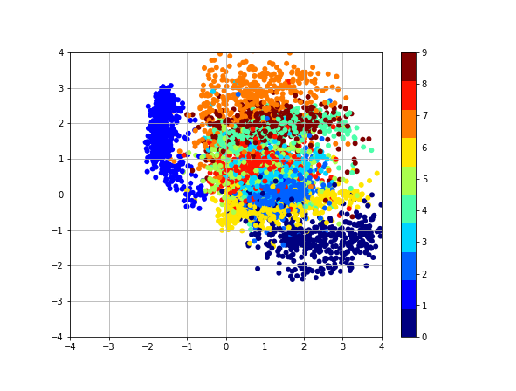

results-2/PMLR_map_epoch_06.png


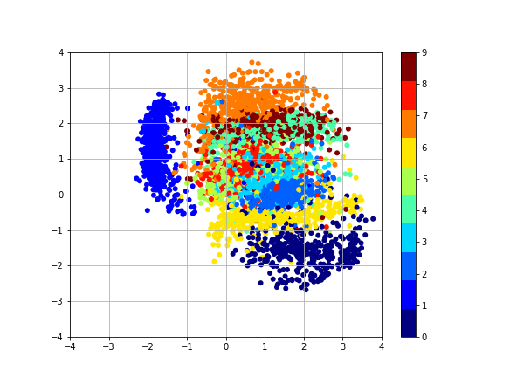

results-2/PMLR_map_epoch_10.png


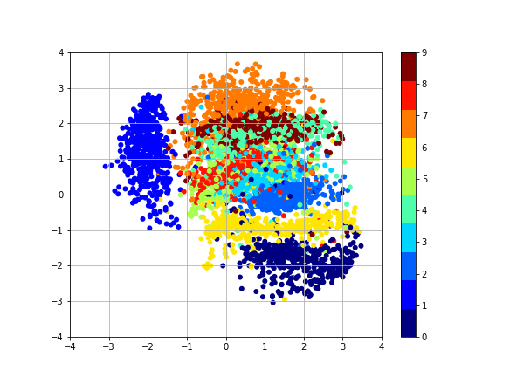

results-2/PMLR_map_epoch_12.png


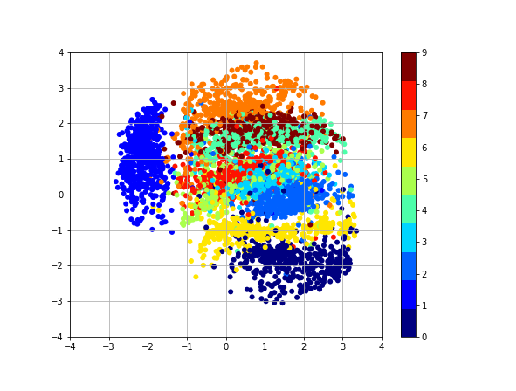

results-2/PMLR_map_epoch_18.png


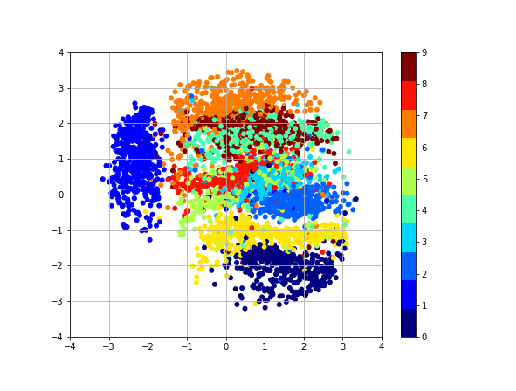

results-2/PMLR_map_epoch_27.png


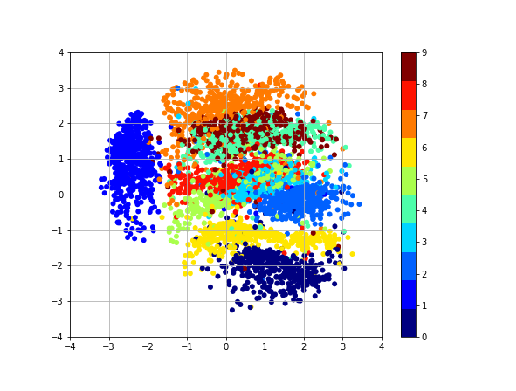

results-2/PMLR_map_epoch_44.png


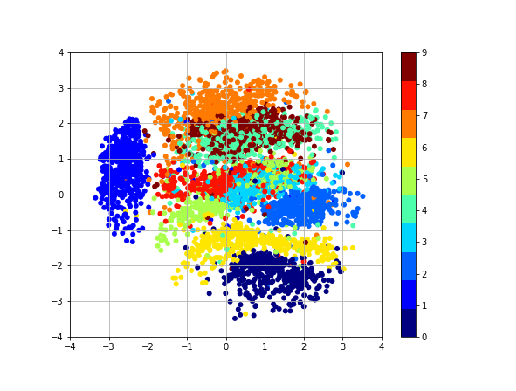

results-2/PMLR_map_epoch_59.png


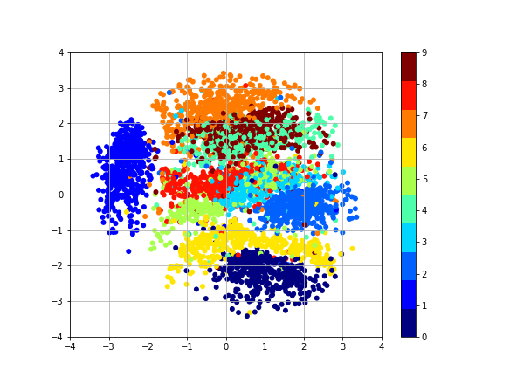

In [10]:
# Latent manifold clustering
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_image_by_filename(filename):
    plt.figure(figsize=(9, 9))
    img = mpimg.imread(filename)
    imgplot = plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.show()
    
prefix = 'PMLR_map'
image_dir = 'results-' + str(2)

filenames = {}
for filename in os.listdir(image_dir):
    if filename.startswith(prefix): 
        value = os.path.join(image_dir, filename)
        key = value.split('.')[0][-2:]
        filenames[key] = value
        
for key, value in sorted(filenames.items()):
    print(value)
    plot_image_by_filename(value)

### Quick question
더 선명한 실험결과(for data generation process)를 얻기 위해서는 어떻게 해야할까요?

답은 [여기](#hint1 "Latent variable의 dimension을 높이면 됩니다.") 를 보세요.